<a href="https://colab.research.google.com/github/HsinYing0315/113-2_Algorithms/blob/main/0326Algor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review: 0319 Zuvio

# Review: Programming Exercise 04

In [ ]:
def merge_two_sorted_arrays(nums1: list, m: int, nums2: list, n: int):
    """
    將兩個已排序的陣列 nums1 和 nums2 合併到 nums1 中。

    Args:
        nums1: 第一個已排序的陣列，長度為 m + n，其中前 m 個元素是有效的，後 n 個元素為 None。
        m: nums1 中有效元素的數量。
        nums2: 第二個已排序的陣列，長度為 n。
        n: nums2 的長度。

    Returns:
        此函式不回傳任何值，它直接修改 nums1。
    """

    # 分別指向 nums1 和 nums2 有效部分的尾端
    end1 = m - 1  # need fix
    end2 = n - 1  # need fix

    # 指向 nums1 的寫入位置（從尾端開始）
    write_idx = m + n - 1 # need fix

    # 從兩個陣列的尾端開始比較，將較大的元素放到 nums1 的寫入位置
    while end1 >= 0 and end2 >= 0:
        if nums1[end1] > nums2[end2]:
            nums1[write_idx] = nums1[end1] # need fix
            end1 -= 1  # nums1 的指標往前移
        else:
            nums1[write_idx] = nums2[end2] # need fix
            end2 -= 1  # nums2 的指標往前移
        write_idx -= 1  # 寫入位置往前移

    # 如果 nums2 還有剩餘元素，將它們複製到 nums1 的開頭
    while end2 >= 0:
        nums1[write_idx] = nums2[end2]
        end2 -= 1
        write_idx -= 1


In [ ]:
nums1 = [5,13,17,None,None,None,None,None]
merge_two_sorted_arrays(nums1, 3, [3,7,11,19], 4)
print(nums1[:7]) #[3, 5, 7, 11, 13, 17, 19]
nums1 = [-1,None,None,None,None,None,None]
merge_two_sorted_arrays(nums1, 1, [-3,-1,0,3], 4)
print(nums1[:5]) #[-3, -1, -1, 0, 3]
nums1 = [-4,1,1,2]
merge_two_sorted_arrays(nums1, 4, [], 0)
print(nums1[:4]) #[-4, 1, 1, 2]
nums1 = [None,None,None,None,None,None,None,None,None,None,None,None,None]
merge_two_sorted_arrays(nums1, 0, [-13,-12,-12,-7,-1,2,5,6,6,13], 10)
print(nums1[:10]) #[-13, -12, -12, -7, -1, 2, 5, 6, 6, 13]
nums1 = [0,0,None,None,None,None,None,None]
merge_two_sorted_arrays(nums1, 2, [-5, -5, 1, 2, 4, 5], 6)
print(nums1[:8]) #[-5, -5, 0, 0, 1, 2, 4, 5]

[3, 5, 7, 11, 13, 17, 19]
[-3, -1, -1, 0, 3]
[-4, 1, 1, 2]
[-13, -12, -12, -7, -1, 2, 5, 6, 6, 13]
[-5, -5, 0, 0, 1, 2, 4, 5]


In [ ]:
import heapq
# version 1: O(n log k)
def find_closest_elements(arr, k, x):
    """
    在一個已排序的整數陣列 arr 中，找出 k 個最接近 x 的元素。

    Args:
        arr: 已排序的整數陣列。
        k: 要找出的最接近元素的數量。
        x: 目標值。

    Returns:
        一個包含 k 個最接近 x 的元素的列表，並以遞增順序排列。
    """
    heap = []  # 初始化一個空的 heap (最小堆積)
    for num in arr:
        dist = abs(num - x)  # 計算目前數字與 x 的距離
        heapq.heappush(heap, (-dist, -num))  # need fix 將 (-距離, -數字) 推入 heap。使用負號是因為 heapq 實作的是最小堆積，我們需要的是最大堆積 (距離越大越優先)
        if len(heap) > k:
            heapq.heappop(heap)  # 如果 heap 中的元素數量超過 k，移除堆頂元素 (距離最大的)

    result = [-num for _, num in heap]  # 從 heap 中取出數字部分 (原本存的是負數，這裡轉回正數)
    result.sort()  # need fix 將結果按照遞增順序排序
    return result

In [ ]:
import heapq
# version 2: O(n log n)
def find_closest_elements(arr, k, x):
    data = [(abs(num - x),num) for num in arr] # 建立一個包含 (距離, 數字) tuples的列表
    result = [num for _, num in heapq.nsmallest(k,data)] # need fix 找出 k 個最小的(距離, 數字)tuples，並取出數字部分
    result.sort() #need fix 將結果按照遞增順序排序
    return result

In [ ]:
print(find_closest_elements([1,2,3,4,5], 2, 3)) # [2, 3]
print(find_closest_elements([1,2,3,4,5], 4, 3)) # [1, 2, 3, 4]
print(find_closest_elements([1,2,3,4,5], 4, -1)) # [1, 2, 3, 4]
print(find_closest_elements([1,1,1,10,10,10], 1, 9)) #[10]
print(find_closest_elements([-2, -1, 0, 0, 1, 2], 4, 0)) #[-1, 0, 0, 1]

[2, 3]
[1, 2, 3, 4]
[1, 2, 3, 4]
[10]
[-1, 0, 0, 1]


# Sorting

In [ ]:
list.sort?

In [ ]:
nums=[2,3,1,7,9,4,6,5]
result = nums.sort()
print(result, nums)

None [1, 2, 3, 4, 5, 6, 7, 9]


In [ ]:
nums=[2,3,1,7,9,4,6,5]
print(nums.sort())

None


In [ ]:
sorted?

In [ ]:
nums=[2,3,1,7,9,4,6,5]
print(sorted(nums))
print(nums)

[1, 2, 3, 4, 5, 6, 7, 9]
[2, 3, 1, 7, 9, 4, 6, 5]


In [ ]:
nums = (2,3,1,7,9,4,6,5)
print(sorted(nums))
print(nums,type(nums))

[1, 2, 3, 4, 5, 6, 7, 9]
(2, 3, 1, 7, 9, 4, 6, 5) <class 'tuple'>


In [ ]:
s = "bgdsyiomo7fr"
t = "bgdsyio7mofr"
print(sorted(s) == sorted(t))
print(s == t)

True
False


In [ ]:
sorted(s), sorted(t)

(['7', 'b', 'd', 'f', 'g', 'i', 'm', 'o', 'o', 'r', 's', 'y'],
 ['7', 'b', 'd', 'f', 'g', 'i', 'm', 'o', 'o', 'r', 's', 'y'])

In [ ]:
sorted("earth"), sorted("heart")

(['a', 'e', 'h', 'r', 't'], ['a', 'e', 'h', 'r', 't'])

# Quicksort

In [ ]:
def quicksort(nums:list, low:int, high:int):
  if low < high:
    pivot_idx = partition(nums, low, high)
    print("pivot is:",nums[pivot_idx], nums)
    quicksort(nums, low, pivot_idx-1)
    quicksort(nums, pivot_idx+1, high)

In [ ]:
def partition(nums:list, low:int, high:int)->int:
  pivot = nums[low]
  leftwall = low
  for i in range(low+1,high+1):
    if nums[i] < pivot:
      leftwall += 1
      nums[i], nums[leftwall] = nums[leftwall], nums[i]
  nums[low], nums[leftwall] = nums[leftwall], nums[low]
  return leftwall

In [ ]:
nums = [3,0,1,8,7,2,5,4,9,6]
quicksort(nums, 0, len(nums)-1)
print(nums)

pivot is: 3 [2, 0, 1, 3, 7, 8, 5, 4, 9, 6]
pivot is: 2 [1, 0, 2, 3, 7, 8, 5, 4, 9, 6]
pivot is: 1 [0, 1, 2, 3, 7, 8, 5, 4, 9, 6]
pivot is: 7 [0, 1, 2, 3, 6, 5, 4, 7, 9, 8]
pivot is: 6 [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
pivot is: 4 [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
pivot is: 9 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# dancing version
def partition(nums:list, low:int, high:int)->int:
  pivot, hat, step = low, high, -1
  while pivot != hat:
    if step == -1 and nums[pivot] > nums[hat]:
      nums[pivot], nums[hat] = nums[hat], nums[pivot]
      pivot, hat, step = hat, pivot, 1
    elif step == 1 and nums[pivot] < nums[hat]:
      nums[pivot], nums[hat] = nums[hat], nums[pivot]
      pivot, hat, step = hat, pivot, -1
    hat += step
  return pivot

In [ ]:
nums = [3,0,1,8,7,2,5,4,9,6]
quicksort(nums, 0, len(nums)-1)
print(nums)

pivot is: 3 [2, 0, 1, 3, 7, 8, 5, 4, 9, 6]
pivot is: 2 [1, 0, 2, 3, 7, 8, 5, 4, 9, 6]
pivot is: 1 [0, 1, 2, 3, 7, 8, 5, 4, 9, 6]
pivot is: 7 [0, 1, 2, 3, 6, 4, 5, 7, 9, 8]
pivot is: 6 [0, 1, 2, 3, 5, 4, 6, 7, 9, 8]
pivot is: 5 [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
pivot is: 9 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Graph

In [ ]:
class GraphVertex:
    def __init__(self, label):
        self.label = label
        self.edges = []  #Edges in Adjacency List
    def __str__(self):
        #output = str(self.label)+': '
        #for e in self.edges:
        #    output += f"{self.label}->{e.label} "
        return f"{self.label}: "+", ".join(f"{self.label}->{e.label}" for e in self.edges)

def initial_graph(n:int, edge_list:list)->list:
    graph = []
    for i in range(n):
        graph.append(GraphVertex(i))
    for e in edge_list:
        if  0 <= e[0] < n and 0 <= e[1] < n:
            graph[e[0]].edges.append(graph[e[1]])
    return graph

edge_list=[[2,4],[4,2],[1,4],[4,1],[3,4],[4,3],[1,3],[3,1]]
graph = initial_graph(5,edge_list)
for v in graph:
    print(v)

0: 
1: 1->4, 1->3
2: 2->4
3: 3->4, 3->1
4: 4->2, 4->1, 4->3


In [ ]:
import networkx as nx

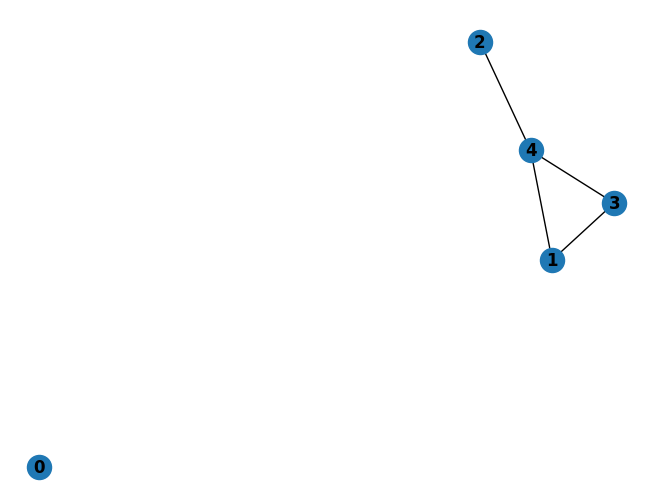

In [ ]:
g = nx.Graph()
g.add_nodes_from(range(5))
g.add_edges_from(edge_list)
nx.draw(g, with_labels=True, font_weight='bold')